In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#import cv2 as cv
import pandas as pd
#import pygame
from scipy.linalg import svd, diagsvd
import matplotlib.image as mpimg
from copy import deepcopy

In [20]:
df = pd.read_csv('ratings_small.csv')
print(df.head(2))
df = df.pivot(index='userId',columns='movieId',values='rating')
df = df.replace(np.nan,0)
X = df.to_numpy()
X.shape

   userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179


(671, 9066)

In [21]:
def comprimir (u, s, vt, K):
    """Remove elementos de u, s e vt deixando somente K componentes restantes
    """ 
    u_ = u[:,:K]
    s_ = s[:K]
    vt_ = vt[:K,:]

    return u_, s_, vt_

In [22]:
X[0,30]

2.5

In [6]:
rating = np.random.randint(1,6)
print(rating)
i = 0
j = 30

Y = deepcopy(X)
Y[i,j] = rating
X[i,j]

2


2.5

In [7]:
def predict(arr,k):
    u0, s0, vt0 = svd(arr)
    u1,s1,vt1 = comprimir(u0,s0,vt0,k)
    # u1,s1,vt1 = u0,s0,vt0
    sigma = diagsvd(s1, u1.shape[1], vt1.shape[0])
    Y = u1 @ sigma @ vt1
    Y = np.around(Y,5)
    return Y

In [8]:
u,s,vt = svd(X)

In [24]:
s

array([517.58313979, 243.76943485, 204.30617832, 162.47028777,
       156.30956977, 145.23455301, 136.81751883, 122.99256885,
       118.74152381, 116.32873458, 111.49367292, 105.79872672,
       105.22888405,  99.23143457,  97.28551406,  92.94461751,
        92.03785085,  91.66845354,  89.86862678,  88.6199206 ,
        87.28696703,  85.49577203,  84.4018213 ,  84.04184504,
        82.09439136,  81.97690614,  80.3072336 ,  79.9572191 ,
        79.22060121,  78.765595  ])

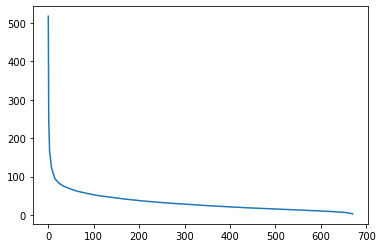

In [9]:
plt.figure()
plt.plot(s)
plt.show()

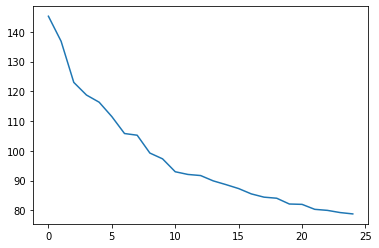

In [23]:
plt.figure()
plt.plot(s[5:450])
plt.show()

In [15]:
k = np.random.randint(0,X.shape[1])
print(k)
Y = predict(Y,k)
Y[i,j]

3746


4.0

In [16]:
X[i,j]

2.5

In [22]:
accuracy = []
from tqdm import tqdm
for n in tqdm(range(1,6)):

    d = dict()

    rating = np.random.randint(1,6)

    i = 0
    j = 30

    Y = deepcopy(X)
    Y[i,j] = rating

    k = 500*n

    Y = predict(Y,k)
    d['Aleatório'] = rating
    d['Estimado'] = Y[i,j]
    d['Correto'] = X[i,j]
    d['Diferença'] = Y[i,j]-X[i,j]
    d['K'] = k
    accuracy.append(d)

accuracy

100%|██████████| 5/5 [00:42<00:00,  8.44s/it]


[{'Aleatório': 2, 'Estimado': 0.0, 'Correto': 2.5, 'Diferença': -2.5, 'K': 0},
 {'Aleatório': 3,
  'Estimado': 2.39177,
  'Correto': 2.5,
  'Diferença': -0.10822999999999983,
  'K': 500},
 {'Aleatório': 4,
  'Estimado': 4.0,
  'Correto': 2.5,
  'Diferença': 1.5,
  'K': 1000},
 {'Aleatório': 5,
  'Estimado': 5.0,
  'Correto': 2.5,
  'Diferença': 2.5,
  'K': 1500},
 {'Aleatório': 4,
  'Estimado': 4.0,
  'Correto': 2.5,
  'Diferença': 1.5,
  'K': 2000}]

In [34]:
accuracy = []
from tqdm import tqdm
for n in tqdm(range(1,11)):

    d = dict()

    rating = np.random.randint(1,6)

    i = 0
    j = 30

    Y = deepcopy(X)
    Y[i,j] = rating

    k = 50*n

    Y = predict(Y,k)
    d['Aleatório'] = rating
    d['Estimado'] = Y[i,j]
    d['Correto'] = X[i,j]
    d['Diferença'] = Y[i,j]-X[i,j]
    d['K'] = k
    accuracy.append(d)

accuracy

100%|██████████| 10/10 [01:34<00:00,  9.41s/it]


[{'Aleatório': 5,
  'Estimado': 0.02617,
  'Correto': 2.5,
  'Diferença': -2.47383,
  'K': 50},
 {'Aleatório': 3,
  'Estimado': 0.02372,
  'Correto': 2.5,
  'Diferença': -2.47628,
  'K': 100},
 {'Aleatório': 1,
  'Estimado': 0.00576,
  'Correto': 2.5,
  'Diferença': -2.49424,
  'K': 150},
 {'Aleatório': 1,
  'Estimado': 0.02519,
  'Correto': 2.5,
  'Diferença': -2.47481,
  'K': 200},
 {'Aleatório': 1,
  'Estimado': 0.14221,
  'Correto': 2.5,
  'Diferença': -2.35779,
  'K': 250},
 {'Aleatório': 3,
  'Estimado': 0.63824,
  'Correto': 2.5,
  'Diferença': -1.8617599999999999,
  'K': 300},
 {'Aleatório': 2,
  'Estimado': 0.60687,
  'Correto': 2.5,
  'Diferença': -1.89313,
  'K': 350},
 {'Aleatório': 2,
  'Estimado': 1.09177,
  'Correto': 2.5,
  'Diferença': -1.40823,
  'K': 400},
 {'Aleatório': 4,
  'Estimado': 2.41842,
  'Correto': 2.5,
  'Diferença': -0.08158000000000021,
  'K': 450},
 {'Aleatório': 4,
  'Estimado': 2.97008,
  'Correto': 2.5,
  'Diferença': 0.47007999999999983,
  'K': 500

In [32]:
accuracy

[{'Aleatório': 4,
  'Estimado': 0.01523,
  'Correto': 2.5,
  'Diferença': -2.48477,
  'K': 50},
 {'Aleatório': 3,
  'Estimado': 0.02372,
  'Correto': 2.5,
  'Diferença': -2.47628,
  'K': 100},
 {'Aleatório': 5,
  'Estimado': 0.18883,
  'Correto': 2.5,
  'Diferença': -2.31117,
  'K': 150},
 {'Aleatório': 5,
  'Estimado': 0.29365,
  'Correto': 2.5,
  'Diferença': -2.20635,
  'K': 200},
 {'Aleatório': 5,
  'Estimado': 0.56655,
  'Correto': 2.5,
  'Diferença': -1.9334500000000001,
  'K': 250},
 {'Aleatório': 4,
  'Estimado': 0.83647,
  'Correto': 2.5,
  'Diferença': -1.66353,
  'K': 300},
 {'Aleatório': 4,
  'Estimado': 1.11323,
  'Correto': 2.5,
  'Diferença': -1.38677,
  'K': 350},
 {'Aleatório': 4,
  'Estimado': 1.82957,
  'Correto': 2.5,
  'Diferença': -0.6704300000000001,
  'K': 400},
 {'Aleatório': 1,
  'Estimado': 1.02124,
  'Correto': 2.5,
  'Diferença': -1.47876,
  'K': 450},
 {'Aleatório': 5,
  'Estimado': 3.58549,
  'Correto': 2.5,
  'Diferença': 1.08549,
  'K': 500}]

In [35]:
d = dict()

rating = np.random.randint(1,6)

i = 0
j = 30

Y = deepcopy(X)
Y[i,j] = rating

k = 400

Y = predict(Y,k)
d['Aleatório'] = rating
d['Estimado'] = Y[i,j]
d['Correto'] = X[i,j]
d['Diferença'] = Y[i,j]-X[i,j]
d['K'] = k
d

{'Aleatório': 5,
 'Estimado': 2.24104,
 'Correto': 2.5,
 'Diferença': -0.2589600000000001,
 'K': 400}

In [36]:
accuracy = []
from tqdm import tqdm
for n in tqdm(range(1,101)):

    d = dict()

    rating = np.random.randint(1,6)

    i = 0
    j = 30

    Y = deepcopy(X)
    Y[i,j] = rating

    k = 350+n

    Y = predict(Y,k)
    d['Aleatório'] = rating
    d['Estimado'] = Y[i,j]
    d['Correto'] = X[i,j]
    d['Diferença'] = Y[i,j]-X[i,j]
    d['K'] = k
    accuracy.append(d)

accuracy

100%|██████████| 100/100 [18:09<00:00, 10.90s/it]


[{'Aleatório': 1,
  'Estimado': 0.37412,
  'Correto': 2.5,
  'Diferença': -2.12588,
  'K': 351},
 {'Aleatório': 5,
  'Estimado': 1.40502,
  'Correto': 2.5,
  'Diferença': -1.09498,
  'K': 352},
 {'Aleatório': 2,
  'Estimado': 0.61302,
  'Correto': 2.5,
  'Diferença': -1.8869799999999999,
  'K': 353},
 {'Aleatório': 1,
  'Estimado': 0.37102,
  'Correto': 2.5,
  'Diferença': -2.12898,
  'K': 354},
 {'Aleatório': 5,
  'Estimado': 1.43755,
  'Correto': 2.5,
  'Diferença': -1.06245,
  'K': 355},
 {'Aleatório': 2,
  'Estimado': 0.62481,
  'Correto': 2.5,
  'Diferença': -1.87519,
  'K': 356},
 {'Aleatório': 4,
  'Estimado': 1.15549,
  'Correto': 2.5,
  'Diferença': -1.34451,
  'K': 357},
 {'Aleatório': 4,
  'Estimado': 1.15735,
  'Correto': 2.5,
  'Diferença': -1.34265,
  'K': 358},
 {'Aleatório': 2,
  'Estimado': 0.62268,
  'Correto': 2.5,
  'Diferença': -1.87732,
  'K': 359},
 {'Aleatório': 2,
  'Estimado': 0.64054,
  'Correto': 2.5,
  'Diferença': -1.85946,
  'K': 360},
 {'Aleatório': 1,
 